<a href="https://colab.research.google.com/github/MUmairAB/Twitter-Climate-Change-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Notebook analyzes the sentiments of 1.1 Million Tweets regarding Climate Change. For Analyzing sentiments, Vader Sentiment Intensity Analyzer utility is used.**

**The tweets are classified as:**
1. **Positive**
2. **Overly Positive**
3. **Negative**
4. **Overly Negative**
5. **Neutral**

**The result of the analysis is shown at the end of the Notebook.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cloning the Github Repo for dataset
!git clone https://github.com/MUmairAB/Twitter-Climate-Change-Sentiment-Analysis.git

Cloning into 'Twitter-Climate-Change-Sentiment-Analysis'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 64 (delta 24), reused 20 (delta 4), pack-reused 0
Unpacking objects: 100% (64/64), 19.64 MiB | 3.29 MiB/s, done.
Filtering content: 100% (2/2), 266.84 MiB | 22.75 MiB/s, done.


In [3]:
# Loading csv file containing tweets data
tweets = pd.read_csv('/content/Twitter-Climate-Change-Sentiment-Analysis/Dataset/climate change tweets.csv')
tweets.shape

(1020515, 7)

Our data is not in clean form. It needs some data cleaning.

Then it needs to be manipulated for natural language processing.

In [4]:
print(f'Data has:\n\t{tweets.shape[0]} rows\n\t{tweets.shape[1]} columns')

Data has:
	1020515 rows
	7 columns


# Data Cleaning

In [5]:
tweets.reset_index(drop=True,inplace=True)
# Looking at the data
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,1/29/2023 4:59,1.620000e+18,@FTOsram This ?? ?? @MikeHudema \nSpends all d...,LastWave_,1.0,0.0,en
1,1/29/2023 4:59,1.620000e+18,"@marklevinshow Oh yes they are! Transgenders, ...",Bk09351447,0.0,0.0,en
2,1/29/2023 4:59,1.620000e+18,@TimRunsHisMouth Trump climate change or racis...,SophieKarakaya,0.0,0.0,en
3,1/29/2023 4:59,1.620000e+18,@ddrathnayake3 Lots of climate drivers impacti...,BlackheathWx,1.0,0.0,en
4,1/29/2023 4:59,1.620000e+18,This is how we normalize #climatechange conver...,ClimateSarahMae,3.0,1.0,en


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020515 entries, 0 to 1020514
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Datetime          1020515 non-null  object 
 1   Tweeter Id        1020515 non-null  float64
 2   Content           1020515 non-null  object 
 3   Twitter Username  1020511 non-null  object 
 4   Likes             1020511 non-null  float64
 5   No of Retweets    1020511 non-null  float64
 6   Tweet Language    1020511 non-null  object 
dtypes: float64(3), object(4)
memory usage: 54.5+ MB


In [7]:
# Check for NULL values
tweets.isnull().sum()

Datetime            0
Tweeter Id          0
Content             0
Twitter Username    4
Likes               4
No of Retweets      4
Tweet Language      4
dtype: int64

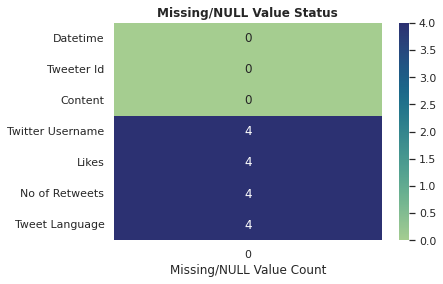

In [8]:
# Heatmap of missing values
sns.heatmap(tweets.isnull().sum().to_frame(),
            annot=True,fmt='d',cmap='crest');
plt.title('Missing/NULL Value Status',fontweight='bold');
plt.xlabel('Missing/NULL Value Count');
plt.savefig('null values heatmap.png',bbox_inches='tight')

In [9]:
# Lets drop NULL values
print("Number of tweets before removing NULL values:",tweets.shape[0])
tweets.dropna(inplace=True)
print("Number of tweets after  removing NULL values:",tweets.shape[0])

Number of tweets before removing NULL values: 1020515
Number of tweets after  removing NULL values: 1020511


In [10]:
# Reindex the DataFrame after removing NULL values
tweets.reset_index(drop=True, inplace=True)

In [11]:
# Let's check total unique values in each column
tweets.nunique()

Datetime             99301
Tweeter Id              13
Content             996952
Twitter Username    486273
Likes                 2246
No of Retweets        1087
Tweet Language          63
dtype: int64

In [12]:
# Selecting "english" tweets
tweets = tweets[tweets['Tweet Language'] == 'en']

In [13]:
# Check for duplicate tweets
print('Number of duplicate tweets INCLUDING the retweets: ',end='')
print(tweets['Content'].duplicated().sum())
# The above statement will give the number of duplicate tweets INCLUDING the retweets.

Number of duplicate tweets INCLUDING the retweets: 19350


In [14]:
# Copy of the original DataFrame for future usage
tweets_copy = tweets.copy()

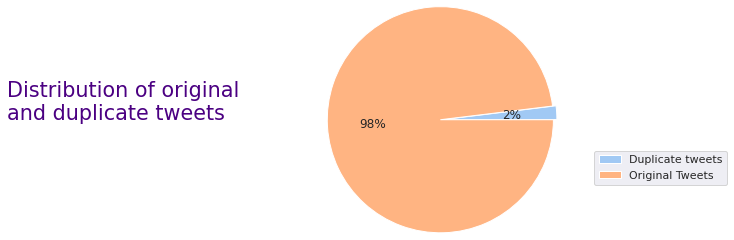

In [15]:
# Let's plot a pie plot to see the duplicate and original tweets distribution 
# length of duplicate tweets
n_dup = tweets['Content'].duplicated().sum()

# length of original tweets
n_org = tweets.shape[0] - tweets.duplicated().sum()

c=sns.color_palette('pastel')[0:2]
plt.pie(x=[n_dup,n_org],explode=[0.02,0.02],colors=c,radius=1.3,
        center=(6,0), autopct='%.0f%%');
plt.legend(labels= ['Duplicate tweets','Original Tweets'],
             loc=(1.2,0.2))
plt.text(1,0,s="Distribution of original\nand duplicate tweets",
        color="indigo",size="xx-large");
plt.savefig('pie chart.png',bbox_inches='tight')

The amount of duplicate tweets shows usage of spam accounts and chat bots to shape the narrative, and amplify a trend on Twitter.

## **In near future, I will try to investigate whether these chat bots are used to shape the pro climate change narrative or anti climate change narrative.**

In [16]:
# Drop duplicate tweets
print('Number of tweets before dropping duplicates:',tweets.shape[0])
tweets.drop(tweets[tweets['Content'].duplicated()].index,inplace=True)
print('Number of tweets after dropping duplicates:',tweets.shape[0])

Number of tweets before dropping duplicates: 987440
Number of tweets after dropping duplicates: 968090


**After dropping the duplicate columns, we MUST reset index for smooth iteration of DataFrame. Otherwise the dropped indices will generate errors while looping through the DataFrame.**

As we can see below the difference in the last index value.

In [17]:
print('The last index value in DataFrame before dropping duplicate tweets:',tweets.index[-1])
tweets.reset_index(drop=True,inplace=True)
print('The last index value in DataFrame after dropping duplicate tweets: ',tweets.index[-1])

The last index value in DataFrame before dropping duplicate tweets: 1020510
The last index value in DataFrame after dropping duplicate tweets:  968089


# NLP
Since we have done the initial data cleaning, we can move on to further processing of the data.

This processing involves:
*   Removal of all links and special characters from the tweets
*   Tokenization and removal of stopwords
*   Lemmatization of the words of tweets

To do this, we'll use **Natural Language Toolkit (NLTK)**. It is a very popular suite of libraries and programs used for statistical natural language processing for English language.


In [18]:
# Importing NLTK and other standard libraries
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
#stopword=set(stopwords.words('english'))
stopword=stopwords.words('english')
# Stop words don't carry much useful information in them.
# Thus, they will be removed from the tweets for further analysis 
sw_extend = ('climate', 'change','global','climatechange','climate change' ,'warming','climate action','environment',
             'environmental change','weather','earth','nature','extreme','wildfire')
stopword.extend(sw_extend)
def tweet_cleaner(twt):
    # lowercase the tweet words
    twt = str(twt).lower()

    # Removing punctuation and external links
    twt = re.sub('\[.*?\]', '', twt)
    twt = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", twt)
    twt = re.sub('https?://\S+|www\.\S+', '', twt)
    twt = re.sub('<.*?>+', '', twt)
    twt = re.sub('[%s]' % re.escape(string.punctuation), '', twt)
    twt = re.sub('\n', '', twt)
    twt = re.sub('\t', '', twt)
    twt = re.sub('. com', '.com', twt)
    twt = re.sub('\w*\d\w*', '', twt)
    twt = re.sub(r"\s{2,}", " ", twt)
    twt = re.sub(r"'", " ", twt)
    twt = re.sub(r":", " : ", twt)
    twt = re.sub(r"#", " ", twt)

    # Removing stop words
    twt = [word for word in twt.split(' ') if word not in stopword]
    twt=" ".join(twt)

    # Lemmatization of the words
    twt = [lemmatizer.lemmatize(word) for word in twt.split(' ')]
    twt=" ".join(twt)
    return twt
tweets["Content"] = tweets["Content"].apply(tweet_cleaner)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,1/29/2023 4:59,1.620000e+18,ftosram mikehudema spends day mum basement go...,LastWave_,1.0,0.0,en
1,1/29/2023 4:59,1.620000e+18,marklevinshow oh yes transgenders forcing vac...,Bk09351447,0.0,0.0,en
2,1/29/2023 4:59,1.620000e+18,timrunshismouth trump racism fault surprised ...,SophieKarakaya,0.0,0.0,en
3,1/29/2023 4:59,1.620000e+18,lot driver impacting plus accelerating plus p...,BlackheathWx,1.0,0.0,en
4,1/29/2023 4:59,1.620000e+18,normalize conversation huge prop ed hawkins re...,ClimateSarahMae,3.0,1.0,en


# Word Cloud
It is nice to plot a word cloud to get the glimpse of the frequently used used in tweets.

For that, we'll use **wordcloud** library.

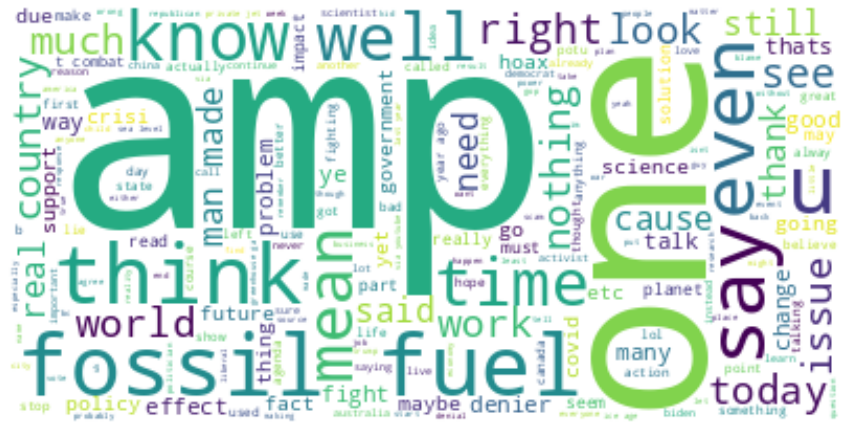

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = " ".join(i for i in tweets['Content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word cloud.png')

# Sentiment Analysis
For sentiment analysis of unlabelled data, we need to use a pre-trained model. There are two popular options:
* **Textblob**
* **Vader**

For social media related sentiment analysis where text contains slang words, empjis and a lot of new Gen Z slang terms, Vader is highly recomended.

In [22]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 13.9 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [24]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

tweets['Sentiment'] = '' # Creating a sentiment column in DataFrame
score = 0.0
Positive_words = list()
Neutral_words = list()
Negative_words = list()

for i in range(tweets.shape[0]):
    score = analyzer.polarity_scores(tweets['Content'][i])['compound']

    if score>=0.75:
        tweets['Sentiment'][i] = 'Overly Positive'
    elif (score>=0.05) and (score<0.75):
        tweets['Sentiment'][i] = 'Positive'
    elif score<=-0.75:
        tweets['Sentiment'][i] = 'Overly Negative'
    elif (score<=-0.05) and (score>-0.75):
        tweets['Sentiment'][i] = 'Negative'
    else:
        tweets['Sentiment'][i] = 'Neutral'
    
    # Word Cloud
    for word in tweets['Content'][i].split():
        word_score = analyzer.polarity_scores(word)['compound']

        if (word_score>=0.05) and (word_score<0.75):
            Positive_words.append(word)
        elif (word_score<=-0.05) and (word_score>-0.75):
            Negative_words.append(word)
        else:
            Neutral_words.append(word)


In [25]:
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language,Sentiment
0,1/29/2023 4:59,1.620000e+18,ftosram mikehudema spends day mum basement go...,LastWave_,1.0,0.0,en,Negative
1,1/29/2023 4:59,1.620000e+18,marklevinshow oh yes transgenders forcing vac...,Bk09351447,0.0,0.0,en,Positive
2,1/29/2023 4:59,1.620000e+18,timrunshismouth trump racism fault surprised ...,SophieKarakaya,0.0,0.0,en,Overly Negative
3,1/29/2023 4:59,1.620000e+18,lot driver impacting plus accelerating plus p...,BlackheathWx,1.0,0.0,en,Neutral
4,1/29/2023 4:59,1.620000e+18,normalize conversation huge prop ed hawkins re...,ClimateSarahMae,3.0,1.0,en,Positive


In [26]:
n_pos = len(Positive_words)
n_neut = len(Neutral_words)
n_neg = len(Negative_words)

In [27]:
print('Number of positive words:',n_pos)
print('Number of neutral words:',n_neut)
print('Number of negative words',n_neg)

Number of positive words: 1145765
Number of neutral words: 12719471
Number of negative words 1069491


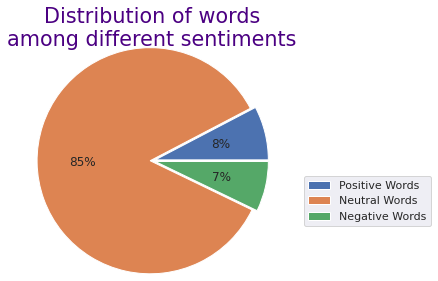

In [29]:
def pie_plot_sentimental_words():
    # Number of tweets for different sentiments
    #c=sns.color_palette('Paired')[0:5]
    x = [n_pos,n_neut,n_neg]
    plt.pie(x=x,
            explode=[0.04,0.02,0.04],
            radius=1.3,center=(6,0), autopct='%.0f%%');
    plt.title("Distribution of words\namong different sentiments",
        color="indigo",size="xx-large");
    plt.legend(labels=['Positive Words','Neutral Words','Negative Words'],
             loc=(1.2,0.2))
    plt.savefig('sentiment words pie chart.png',bbox_inches='tight')

pie_plot_sentimental_words()


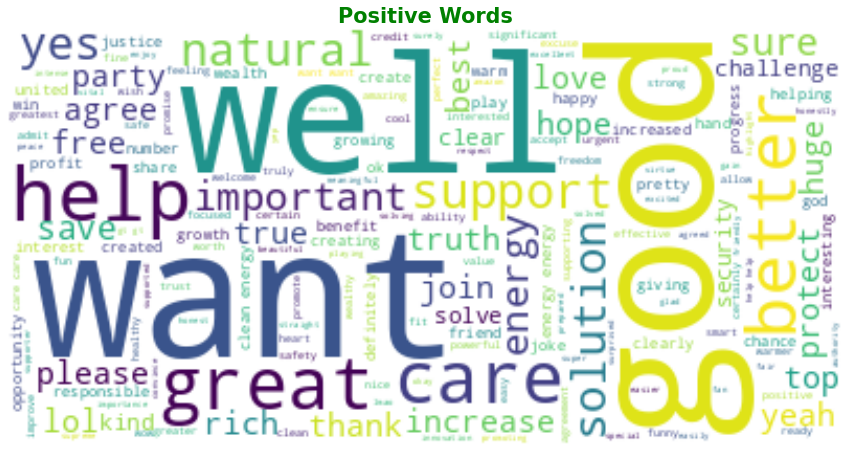

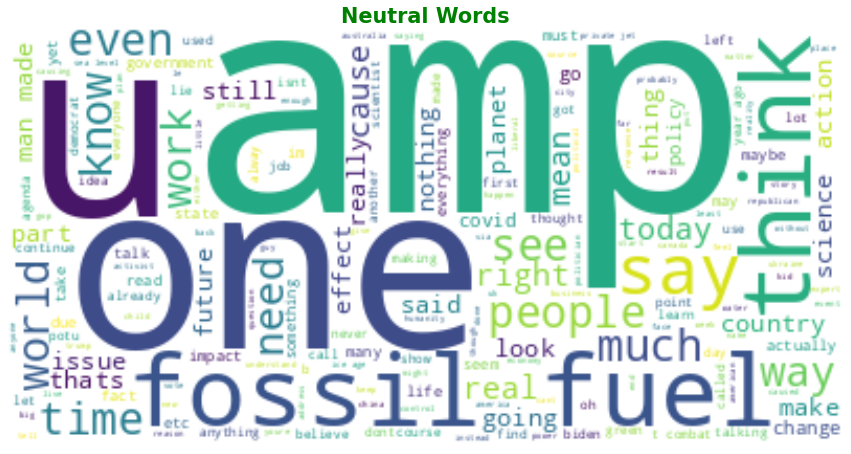

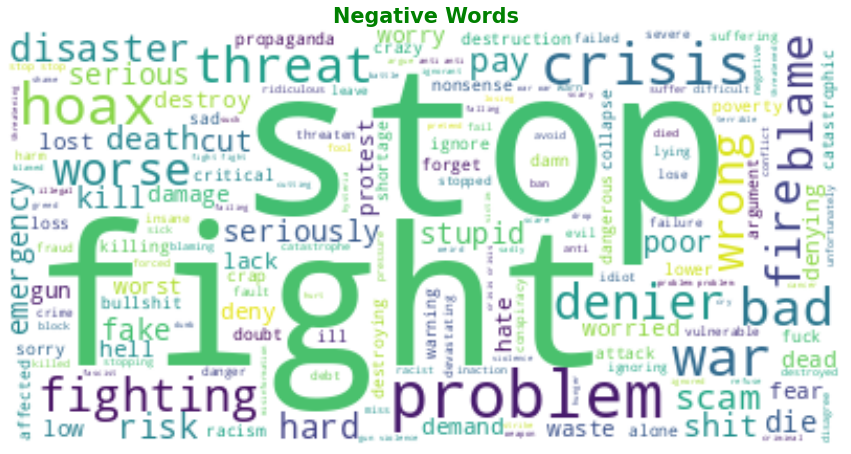

In [30]:
# Word clouds
for w_list, cloud_title in zip([Positive_words,Neutral_words,Negative_words],
               ['Positive Words','Neutral Words','Negative Words']):
       if w_list:
          text = " ".join(i for i in w_list)
          stopwords = set(STOPWORDS)
          wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
          plt.figure(figsize=(15,8))
          plt.imshow(wordcloud, interpolation='bilinear')
          plt.axis("off")
          plt.title(label=cloud_title,size='xx-large',
                    fontdict={'fontsize': 'xx-large',
                              'fontweight': 'bold',
                              'color': 'green'})
          plt.savefig(f'{cloud_title}.png')

In [31]:
sent_df = pd.DataFrame(tweets['Sentiment'].value_counts())
display(sent_df)

,Sentiment
Positive,316581
Negative,313633
Neutral,188916
Overly Negative,80380
Overly Positive,68580


# Sentiment plots

**Average likes and retweets on different sentiments**

In [32]:
tweets.groupby(by="Sentiment")[['Likes',	'No of Retweets']].mean().\
               sort_values(by='Likes',ascending=False).style.background_gradient(cmap='Purples')

,Likes,No of Retweets
Sentiment,,
Overly Positive,20.172558,4.040230
Overly Negative,14.960625,3.807601
Positive,13.911280,3.044361
Negative,13.007926,3.014769
Neutral,8.724412,1.924003


**Time Series plot of sentiments**

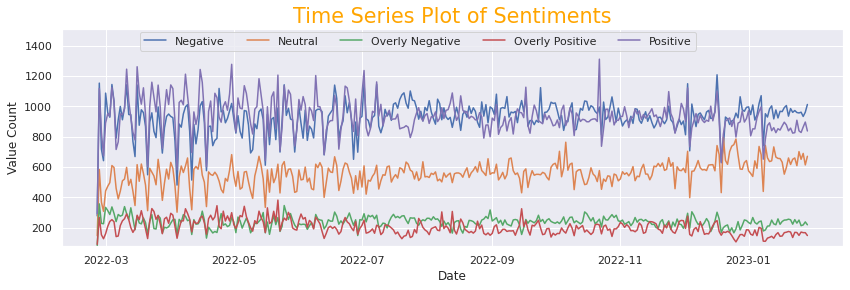

In [33]:
# Lets plot the timeseries of sentiments
tw_copy = tweets.copy()

tw_copy["Datetime"] = pd.to_datetime(tw_copy['Datetime'])
time_series = tw_copy.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
time_series.reset_index(inplace=True)

# Lets unpivot the DataFrame
time_series = time_series.melt("Datetime", var_name='Sentiment',  value_name='Value Count')

plt.figure(figsize=(14,4))
plot = sns.lineplot(x="Datetime", y="Value Count", hue="Sentiment", data=time_series)
plot.legend(loc=(0.1,0.9),ncol=5)
plt.title('Time Series Plot of Sentiments',size='xx-large',color='orange')
plt.ylim((time_series['Value Count'].min()),((time_series['Value Count'].max())+200))
plt.xlabel('Date')
plt.savefig('Time Series Plot.png',bbox_inches='tight')

**Sentiments bar graph**

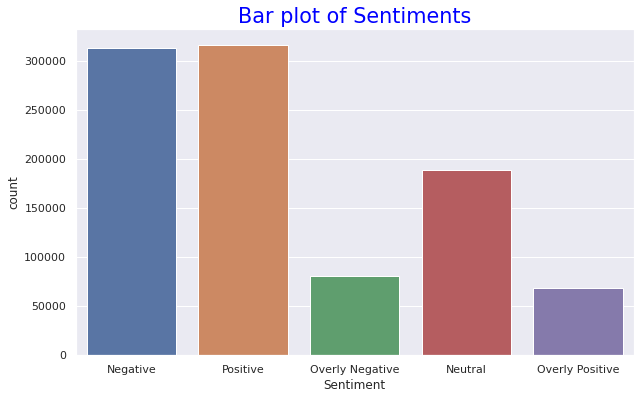

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment',data=tweets);
plt.title("Bar plot of Sentiments",size='xx-large',color='blue')
plt.savefig('bar plot.png')

**Bar plot does not give a relative count clearly. So, let's plot pie plot**

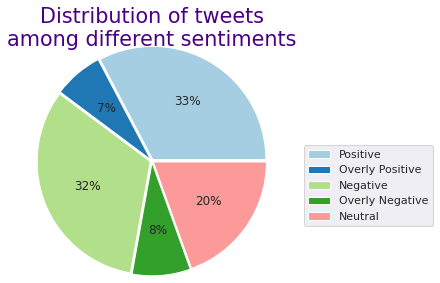

In [35]:
def pie_plot():
    # Number of tweets for different sentiments
    pos = tweets[tweets['Sentiment']=='Positive'].shape[0]
    over_pos = tweets[tweets['Sentiment']=='Overly Positive'].shape[0]
    neg = tweets[tweets['Sentiment']=='Negative'].shape[0]
    over_neg = tweets[tweets['Sentiment']=='Overly Negative'].shape[0]
    neut = tweets[tweets['Sentiment']=='Neutral'].shape[0]
    #print(pos,over_pos,neg,over_neg,neut)
    
    c=sns.color_palette('Paired')[0:5]
    plt.pie(x=[pos,over_pos,neg,over_neg,neut],
            explode=[0.02,0.02,0.02,0.02,0.02],
            colors=c,radius=1.3,center=(6,0), autopct='%.0f%%');
    plt.title("Distribution of tweets\namong different sentiments",
        color="indigo",size="xx-large");
    plt.legend(labels=['Positive','Overly Positive','Negative','Overly Negative','Neutral'],
             loc=(1.2,0.2))
    plt.savefig('sentiment pie chart.png',bbox_inches='tight')

pie_plot()


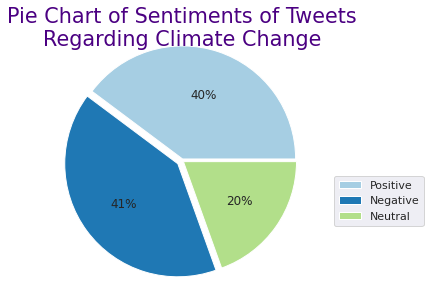

In [39]:
def pie_plot_2():
    # Number of tweets for different sentiments
    pos = tweets[tweets['Sentiment']=='Positive'].shape[0]
    over_pos = tweets[tweets['Sentiment']=='Overly Positive'].shape[0]
    neg = tweets[tweets['Sentiment']=='Negative'].shape[0]
    over_neg = tweets[tweets['Sentiment']=='Overly Negative'].shape[0]
    neut = tweets[tweets['Sentiment']=='Neutral'].shape[0]
    
    # Lets segreagte Postive, Negative and Neutral tweets
    POS = pos + over_pos
    NEG = neg + over_neg
    
    c=sns.color_palette('Paired')[0:3]
    plt.pie(x=[POS,NEG,neut],
            explode=[0.02,0.06,0.02],
            colors=c,radius=1.3,center=(6,0), autopct='%.0f%%');
    plt.title("Pie Chart of Sentiments of Tweets\nRegarding Climate Change",
        color="indigo",size="xx-large");
    plt.legend(labels=['Positive','Negative','Neutral'],
             loc=(1.2,0.2))
    plt.savefig('sentiment3 pie chart.png',bbox_inches='tight')

pie_plot_2()

In [40]:
tweets.to_csv('tweets_with_sentiments')